# Step 2: Time Series Analysis

In [12]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [5]:
df = pd.read_csv("../data/cleaned_daily-minimum-temperatures-in-me.csv")
df.columns = ['ds','y']

In [ ]:
for date in pd.date_range('2021–01–01', '2021–12–31', freq='M'):
 delta = date - pd.offsets.MonthBegin(1)
 train = series.loc[delta:date-pd.offsets.Day(1)]
 valid = series.loc[date:date+pd.offsets.MonthEnd(1)]

In [6]:
m = Prophet()
m.fit(df)

12:18:57 - cmdstanpy - INFO - Chain [1] start processing
12:18:57 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.515162,11.351568,18.108367
4011,1991-12-28,14.544412,11.151770,17.762206
4012,1991-12-29,14.504513,11.238924,17.813730
4013,1991-12-30,14.706812,11.424651,18.025887
4014,1991-12-31,14.886718,11.611811,17.963972


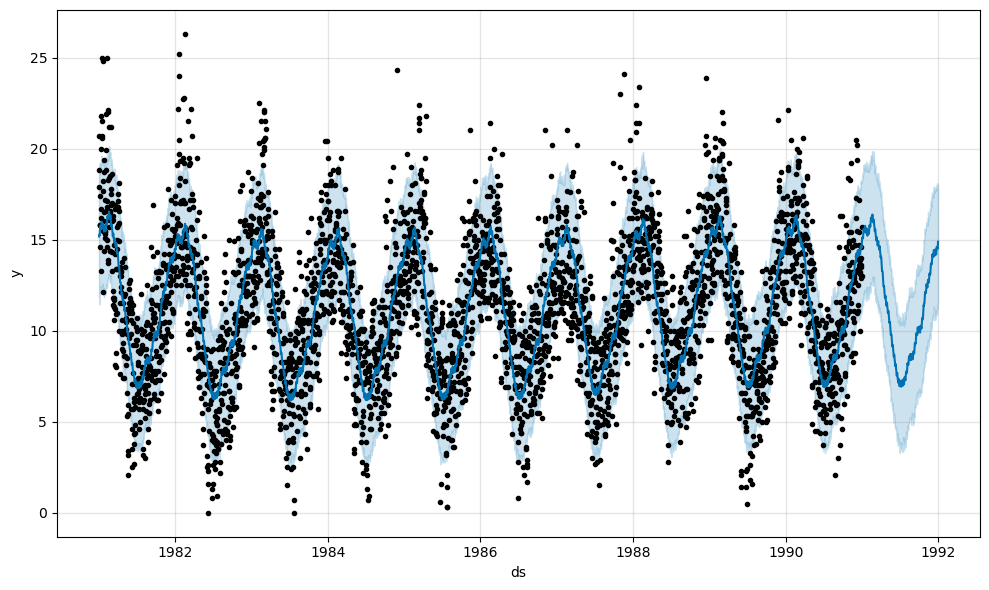

In [9]:
fig1 = m.plot(forecast)